In [201]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [202]:
def get_column(data, index):
    result = []
    for row in data:
        result.append(row[index])

    return result


def min_max_scaler(data):
    data = np.array(data)
    min_val = data.min(axis=0)
    max_val = data.max(axis=0)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=",", skip_header=1).tolist()
    colums = np.genfromtxt(
        file_name_dataset, delimiter=",", max_rows=1, dtype=str
    ).tolist()
    N = len(data)

    print(f"Number of rows in the dataset: {N}")

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales ( index =3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = np.array(
        [
            [1, x1, x2, x3]
            for x1, x2, x3 in zip(
                min_max_scaler(tv_data),
                min_max_scaler(radio_data),
                min_max_scaler(newspaper_data),
            )
        ]
    )
    # X = np.array(
    #     [
    #         [1, x1, x2, x3]
    #         for x1, x2, x3 in zip(
    #             (tv_data),
    #             (radio_data),
    #             (newspaper_data),
    #         )
    #     ]
    # )
    y = sales_data
    return X, y, data, colums

In [203]:
X, y, data, columns = prepare_data("advertising.csv")
df = pd.DataFrame(data, columns=columns)
df.head()  # Display the first few rows of the table

Number of rows in the dataset: 200


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [204]:
def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    # return [0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0]
    return np.array([w1, w2, w3, b])
    # return [w1, w2, w3, b]


def predict(X_features, weights):
    return np.dot(X_features, weights)


def compute_loss(y, y_hat):
    # MSE loss
    loss = (y_hat - y) ** 2
    return loss


# compute gradient
def compute_gradient(X_features, y, y_hat):
    dl_dwweights = 2 * (y_hat - y) * X_features
    return dl_dwweights


# update weights
def update_weight(weights, dl_dwweights, lr):
    weights -= lr * dl_dwweights
    return weights

In [205]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0

        for i in range(N):
            X_features = X_data[i]
            y = y_data[i]

            # dự đoán giá trị y_hat và tính toán loss
            y_hat = predict(X_features, weights)

            # tính loss
            loss = compute_loss(y, y_hat)

            # tính toán gradient
            dl_dw = compute_gradient(X_features, y, y_hat)

            # cập nhật trọng số
            weights = update_weight(weights, dl_dw, lr)

            # tổng trong epoch
            loss_total += loss

        losses.append(loss_total / N)

    return weights, losses


def implement_linear_regression_N_sample(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw_total = np.zeros(len(weights))

        for i in range(N):
            X_features = X_data[i]
            y = y_data[i]

            # dự đoán giá trị y_hat và tính toán loss
            y_hat = predict(X_features, weights)

            # tính loss
            loss = compute_loss(y, y_hat)

            # tính toán gradient
            dl_dw = compute_gradient(X_features, y, y_hat)

            # tổng trong epoch
            loss_total += loss
            dw_total += dl_dw

        # cập nhật trọng số sau mỗi epoch
        weights = update_weight(weights, dw_total / N, lr)

        losses.append(loss_total / N)

    return weights, losses

In [210]:
weights, losses = implement_linear_regression(X, y, epoch_max=100, lr=1e-3)
weights2, losses2 = implement_linear_regression_N_sample(X, y, epoch_max=100, lr=1e-2)

Weights from the first implementation:  [ 5.10261642 15.36369184  4.8778036   0.62565358]
Weights from the second implementation:  [8.86046459 6.35723628 4.53563662 2.38075213]
Losses from the first implementation:  2.782488943770296
Losses from the second implementation:  10.955877332342254


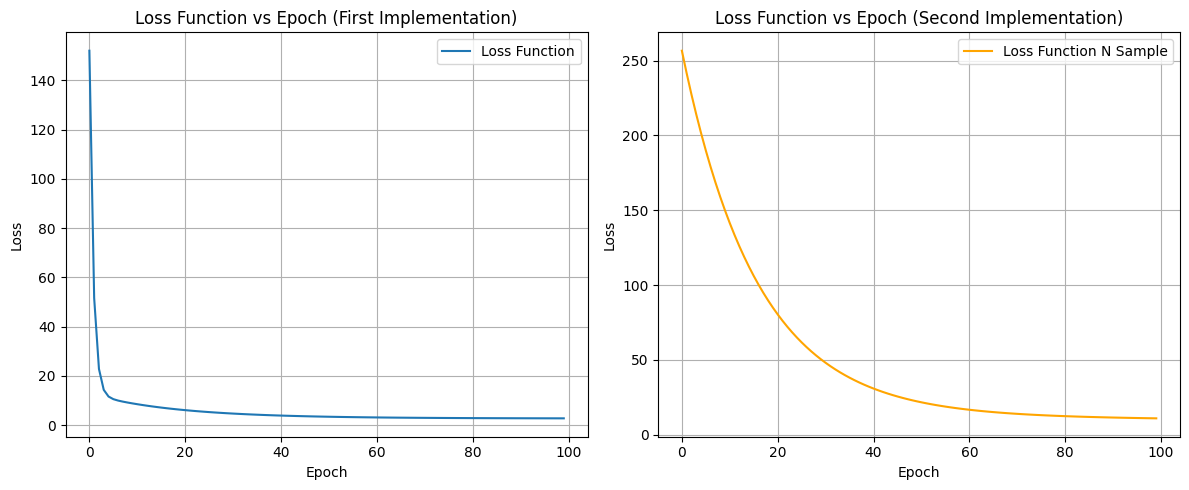

In [211]:
print("Weights from the first implementation: ", weights)
print("Weights from the second implementation: ", weights2)
print("Losses from the first implementation: ", losses[-1])
print("Losses from the second implementation: ", losses2[-1])

# Plot the loss function
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the first implementation
axs[0].plot(losses, label="Loss Function")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss Function vs Epoch (First Implementation)")
axs[0].legend()
axs[0].grid()

# Plot for the second implementation
axs[1].plot(losses2, label="Loss Function N Sample", color="orange")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss Function vs Epoch (Second Implementation)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()